Summary
One of the main questions asked were what are the top Italian restaurants by price and rating in Denver, Northern Colorado and Colorado Springs. The second question that was asked was what was the average rating and price of restaurants by city in order to determine of one metro area had better offerings, in terms of Italian food, than others. The hypothesis was that Denver might have more to offer than Colorado Springs and Northern Colorado. The third question was: is there any correlation between price and rating? If a restaurant has a pricier cuisine, is it going to bring in higher ratings? The hypothesis for this question that as the price of food goes up, the quality is higher and would more than likely generate higher ratings. 

Overall, in reviewing the top 20 Italian restaurants we found a combination of pizza places, sandwich shops and more upscale restaurants. Denver had the most variety in terms of price, ratings and cuisine type. Denver also tended to have more higher priced options as well as higher rated restaurants overall. There is minimal correlation between rating and price between all cities. There was some relationship between price and rating in restaurants in Denver suggesting that lower priced restaurants were more likely to get higher reviews. The highest rated and highest priced restuarants are in Denver.

In [2]:
%matplotlib inline

# Dependencies
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Zomato API key
from config import gkey

In [3]:
# Variables used to extract data for Denver dataframe
target_city = "305"   # city_id for Denver
target_search = "55"  # cuisine_id for Italian
target_radius = 80    # in meters, about .05 miles

# set up a parameters dictionary
params = {
    "apikey": gkey,
    "start": 0,
    "city_id": target_city,
    "radius": target_radius,
    "cuisines": target_search,
    "sort": "rating", "cost"
    "order": "desc",
    "count": 20
}

# base url
base_url = "https://developers.zomato.com/api/v2.1/search"

#  using params dictionary
response = requests.get(base_url, params=params)
print(response.url)


https://developers.zomato.com/api/v2.1/search?apikey=f4188a23e764bfe4d12ed1e1b1ef9571&start=0&city_id=305&radius=80&cuisines=55&sort=rating&costorder=desc&count=20


In [4]:
# convert response to json
places_data = response.json()



In [5]:
resp = requests.get(base_url, params).json()

In [6]:
# Function populates list with dictionaries of api data used in Denver Italian DataFrame

def get_restaurant(resp, canonical_food_type): 
    rows = []
    for i in resp.get("restaurants"):
        q = i.get("restaurant").get("location").get("city")
        target_search = i.get("restaurant").get("cuisines")
        name = i.get("restaurant").get("name")
        review = i.get("restaurant").get("user_rating").get("aggregate_rating")
        price = i.get("restaurant").get("average_cost_for_two")
        rows.append({
#           "Food_Type": target_search, This data returned multiple data values including Italian, consolidated 
            #under Ultimate_Food_Type as Italian
            "Ultimate_Food_Type": canonical_food_type,
            "Restaurant": name,
            "Rating": review,
            "City": q,
            "Price": price
            
        })
        
    return rows


In [7]:
#Create Denver top 20 restaurant Italian dataframe sorted by rating

Den_Ital = pd.DataFrame.from_records(get_restaurant(resp, "Italian"))
Den_Ital.sort_values(by = ["Rating"], ascending= True, inplace = True)
Den_Ital.at[11,'Restaurant'] = 'Maggiano Little Italy'  #Rename duplicate restaurant name to represent unique data for each


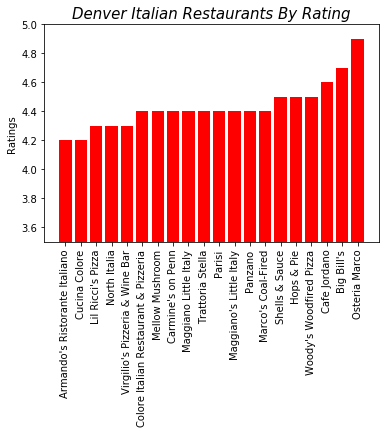

In [8]:
#Create bar chart representing top 20 Denver Italian restaurant's ratings

y_axis = Den_Ital["Rating"].astype(float)
x_axis = Den_Ital["Restaurant"]

plt.bar(x_axis, y_axis, color='r', alpha=1, align="center")  #IMPORTANT
plt.xticks(x_axis.unique(), Den_Ital["Restaurant"].unique(), rotation='vertical')

plt.ylabel("Ratings")
plt.title("Denver Italian Restaurants By Rating", fontsize=15, fontweight=0, style='italic' )
plt.ylim(bottom=3.5, top=5)
plt.savefig("Den_Ital_Rating.png", bbox_inches='tight', pd_inches=.5)


In the Denver Italian Restuarants by Rating chart, we see the ratings for the top 20 Denver Italian restaurants range from 4.2 to 4.8 with the most common rating being 4.4. This data suggests a high amount of variety and high quality dining options for Italian food in Denver. 

In [9]:
#Create Denver top 20 Italian restaurants dataframe sorted by price

Den_Ital = pd.DataFrame.from_records(get_restaurant(resp, "Italian"))
Den_Ital.sort_values(by = ["Price"], ascending= True, inplace = True)
Den_Ital.at[11,'Restaurant'] = 'Maggiano Little Italy'



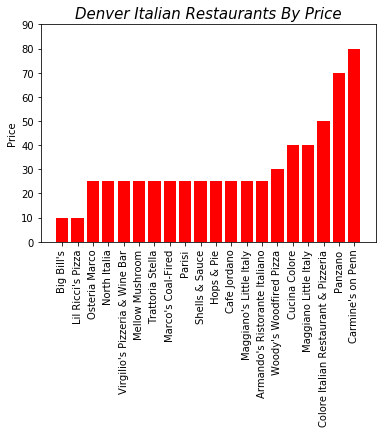

In [10]:
#Create bar chart representing top 20 Denver Italian restaurant's prices

y_axis = Den_Ital["Price"].astype(float)
x_axis = Den_Ital["Restaurant"]

plt.bar(x_axis, y_axis, color='r', alpha=1, align="center")  #IMPORTANT
plt.xticks(x_axis.unique(), Den_Ital["Restaurant"].unique(), rotation='vertical')

plt.ylabel("Price")
plt.title("Denver Italian Restaurants By Price", fontsize=15, fontweight=0, style='italic' )

plt.ylim(bottom=0, top=90)
plt.savefig("Den_Ital_Price.png", bbox_inches='tight', pd_inches=.5)

The Denver Italian Restaurants By Price chart shows a variable price range for the top 20 Italian restaurants in Denver. Prices ranged from 10 to 80 dollars with most restaurants falling within the 25 dollar price range. Prices were determined by the restaurant and includes the average price of a meal for two. This chart suggests that the highest rated restaurants for Italian in Denver are not necessarily the most expensive restaurants. 

In [11]:
# Variables used to extract data for Colorado Springs dataframe

target_city_CS = "529" # city_id for Denver
target_search = "55"   # cuisine_id for Italian
target_radius = 80     # in meters, about .05 miles


# set up a parameters dictionary
params_CS = {
    "apikey": gkey,
    "start": 0,
    "city_id": target_city_CS,
    "radius": target_radius,
    "cuisines": target_search,
    "sort": "rating", "cost"
    "order": "desc",
    "count": 20
}

# base url
base_url = "https://developers.zomato.com/api/v2.1/search"

# run a request using our params dictionary
response_CS = requests.get(base_url, params=params_CS)
print(response_CS.url)


https://developers.zomato.com/api/v2.1/search?apikey=f4188a23e764bfe4d12ed1e1b1ef9571&start=0&city_id=529&radius=80&cuisines=55&sort=rating&costorder=desc&count=20


In [12]:
# convert response to json
places_data_CS = response_CS.json()



In [13]:
resp_CS = requests.get(base_url, params_CS).json()

In [14]:
# Function populates list with dictionaries of api data used in Colorado Springs DataFrame

def get_restaurant(resp_CS, canonical_food_type): 
    rows = []
    for i in resp_CS.get("restaurants"):
        q = i.get("restaurant").get("location").get("city")
        target_search = i.get("restaurant").get("cuisines")
        name = i.get("restaurant").get("name")
        review = i.get("restaurant").get("user_rating").get("aggregate_rating")
        price = i.get("restaurant").get("average_cost_for_two")
        rows.append({
            "Ultimate_Food_Type": canonical_food_type,
            "Restaurant": name,
            "Rating": review,
            "City": q,
            "Price": price
            
        })
        
    return rows

In [31]:
#Create CO Springs top 20 Italian restaurants dataframe sorted by rating

CS_Ital = pd.DataFrame.from_records(get_restaurant(resp_CS, "Italian"))
CS_Ital.sort_values(by = ["Rating"], ascending= True, inplace = True)


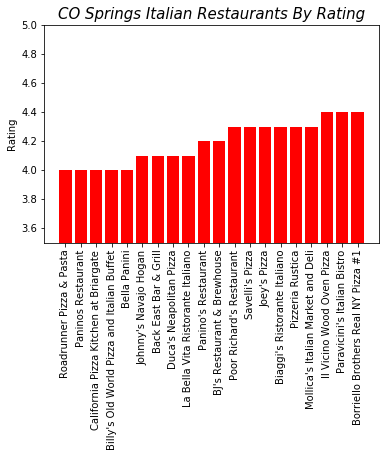

In [16]:
#Create bar chart representing top 20 Colorado Springs Italian restaurant's ratings

y_axis = CS_Ital["Rating"].astype(float)
x_axis = CS_Ital["Restaurant"]

plt.bar(x_axis, y_axis, color='r', alpha=1, align="center")  #IMPORTANT
plt.xticks(x_axis.unique(), CS_Ital["Restaurant"].unique(), rotation='vertical')

plt.ylabel("Rating")
plt.title("CO Springs Italian Restaurants By Rating", fontsize=15, fontweight=0, style='italic' )


plt.ylim(bottom=3.5, top=5)
plt.savefig("CS_Ital_Rating.png", bbox_inches='tight', pd_inches=.5)

The Colorado Springs Italian Restaurants By Rating graph shows a limited range of ratings from 4.0 to 4.4. This graph suggests that the quality of restaurants in Denver is slighlyt higher than in Colorado Springs. 

In [17]:
#Create CO Springs top 20 Italian restaurant dataframe sorted by price

CS_Ital = pd.DataFrame.from_records(get_restaurant(resp_CS, "Italian"))
CS_Ital.sort_values(by = ["Price"], ascending= True, inplace = True)


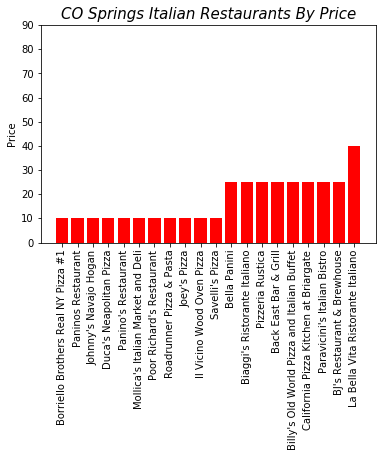

In [18]:
#Create bar chart representing top 20 Colorado Springs Italian restaurant's prices

y_axis = CS_Ital["Price"].astype(float)
x_axis = CS_Ital["Restaurant"]

plt.bar(x_axis, y_axis, color='r', alpha=1, align="center")  #IMPORTANT
plt.xticks(x_axis.unique(), CS_Ital["Restaurant"].unique(), rotation='vertical')

plt.ylabel("Price")
plt.title("CO Springs Italian Restaurants By Price", fontsize=15, fontweight=0, style='italic' )

plt.ylim(bottom=0, top=90)
plt.savefig("CS_Ital_Price.png", bbox_inches='tight', pd_inches=.5)

The Colorado Springs Italian Restaurants by Price shows the cost of an average meal ranges from 10 to 40 dollars, with most restaurants falling within the 10 dollar price range. Prices for restaurants in Colorado Springs seems to be lower than prices in Denver. 

In [19]:
# Variables used to extract data for Northern CO dataframe
target_city_NoCo = "541" # city_id for Northern CO
target_search = "55"     # cuisine_id for Italian
target_radius = 80       # in meters, about .05 miles

# set up a parameters dictionary
params_NoCo = {
    "apikey": gkey,
    "start": 0,
    "city_id": target_city_NoCo,
    "radius": target_radius,
    "cuisines": target_search,
    "sort":  "rating", "cost"
    "order": "desc",
    "count": 20
}

# base url
base_url = "https://developers.zomato.com/api/v2.1/search"

# run a request using our params dictionary
response_NoCo = requests.get(base_url, params=params_NoCo)
print(response_NoCo.url)

https://developers.zomato.com/api/v2.1/search?apikey=f4188a23e764bfe4d12ed1e1b1ef9571&start=0&city_id=541&radius=80&cuisines=55&sort=rating&costorder=desc&count=20


In [20]:
# convert response to json
places_data_NoCo = response_NoCo.json()

 

In [21]:
resp_NoCo = requests.get(base_url, params_NoCo).json()

In [22]:
# Function populates list with dictionaries of api data used in Northern CO DataFrame

def get_restaurant(resp_NoCo, canonical_food_type): 
    rows = []
    for i in resp_NoCo.get("restaurants"):
        q = i.get("restaurant").get("location").get("city")
        target_search = i.get("restaurant").get("cuisines")
        name = i.get("restaurant").get("name")
        review = i.get("restaurant").get("user_rating").get("aggregate_rating")
        price = i.get("restaurant").get("average_cost_for_two")
        rows.append({
            "Ultimate_Food_Type": canonical_food_type,
            "Restaurant": name,
            "Rating": review,
            "City": q,
            "Price": price
            
        })

    return rows

In [32]:
#Create Northern CO top 20 Italian restaurant dataframe sorted by rating

NoCo_Ital = pd.DataFrame.from_records(get_restaurant(resp_NoCo, "Italian"))
NoCo_Ital.sort_values(by = ["Rating"], ascending= True, inplace = True)




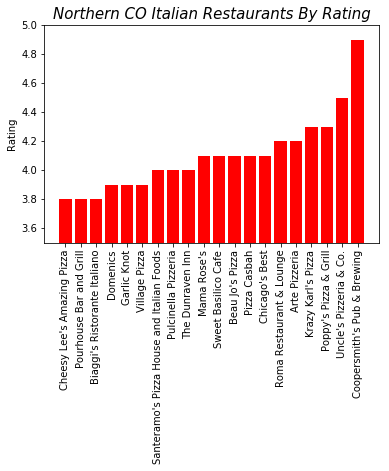

In [24]:
#Create bar chart representing top 20 Northern CO Italian restaurant's ratings

y_axis = NoCo_Ital["Rating"].astype(float)
x_axis = NoCo_Ital["Restaurant"]

plt.bar(x_axis, y_axis, color='r', alpha=1, align="center")  #IMPORTANT
plt.xticks(x_axis.unique(), NoCo_Ital["Restaurant"].unique(), rotation='vertical')

plt.ylabel("Rating")
plt.title("Northern CO Italian Restaurants By Rating", fontsize=15, fontweight=0, style='italic' )

plt.ylim(bottom=3.5, top=5)
plt.savefig("NoCo_Ital_Rating.png", bbox_inches='tight', pd_inches=.5)

The Northern Colorado Italian Restaurants By Rating show the most variability in ratings for the top 20 Italian restaurants. The ratings ranged from 3.8 to 4.8, suggesting limited quality restaurants for Italian in Northern Colorado when compared to Denver and Colorado Springs. 

In [25]:
#Create Northern CO top 20 Italian restaurant dataframe sorted by price

NoCo_Ital = pd.DataFrame.from_records(get_restaurant(resp_NoCo, "Italian"))
NoCo_Ital.sort_values(by = ["Price"], ascending= True, inplace = True)

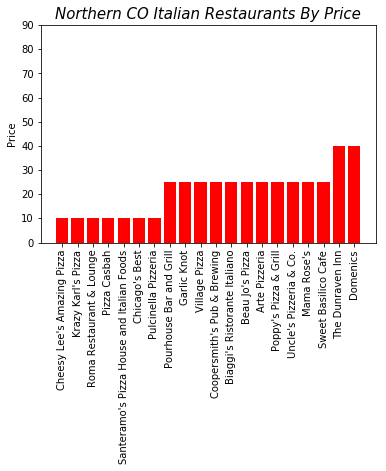

In [26]:
#Create bar chart representing top 20 Nothern CO Italian restaurant's prices

y_axis = NoCo_Ital["Price"].astype(float)
x_axis = NoCo_Ital["Restaurant"]

plt.bar(x_axis, y_axis, color='r', alpha=1, align="center")  #IMPORTANT
plt.xticks(x_axis.unique(), NoCo_Ital["Restaurant"].unique(), rotation='vertical')

plt.ylabel("Price")
plt.title("Northern CO Italian Restaurants By Price", fontsize=15, fontweight=0, style='italic' )


plt.ylim(bottom=0, top=90)
plt.savefig("NoCo_Ital_Price.png", bbox_inches='tight', pd_inches=.5)

The Northern CO Italian Restaurants By Price chart shows that most restaurants in Northern Colorado are at or below the 25 dollar price range. This chart suggests that the price of Italian food in Colorado Springs and Northern Colorado is somewhat similar while Denver has more higher priced restaurants. The restaurant prices in Northern Colorado may reflect the lower socioeconomic status of individuals residing in the area. 

In [27]:
#Combine three data frames

combine = pd.concat([Den_Ital,NoCo_Ital,CS_Ital], axis=0, join='outer')
 

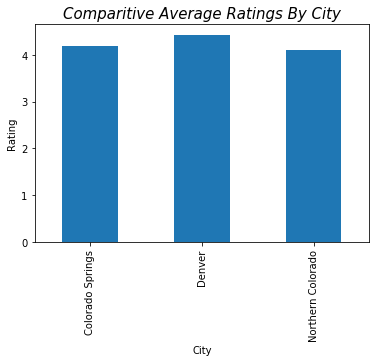

In [28]:
#Create bar chart comparing avg ratings between cities

combine["Rating"] = combine["Rating"].astype(float)

combine.groupby("City").agg({
    "Rating": "mean"
}).plot(legend=False, kind="bar")

plt.ylabel("Rating")
plt.title("Comparitive Average Ratings By City", fontsize=15, fontweight=0, style='italic' )

plt.savefig("City_Ital_Rating.png", bbox_inches='tight', pd_inches=.5)

The Comparative Average Ratings By City chart shows fairly consistent ratings across Colorado Springs, Denver, and Northern Colorado restaurants. However, Denver shows the highest ratings and Northern Colorado shows the lowest ratings. 

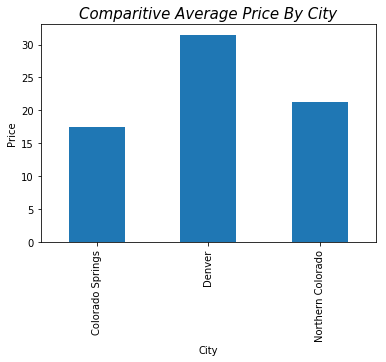

In [29]:
#Create bar chart comparing avg prices between cities

combine["Price"] = combine["Price"].astype(float)

combine.groupby("City").agg({
    "Price": "mean"
}).plot(legend=False,kind="bar")

plt.ylabel("Price")
plt.title("Comparitive Average Price By City", fontsize=15, fontweight=0, style='italic' )

plt.savefig("City_Ital_Price.png", bbox_inches='tight', pd_inches=.5)

The Comparative Average Price By City shows Denver with the most high-priced restaurants and Colorado Springs with the least expensive restaurants overall. 

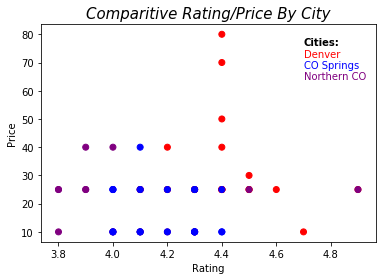

In [30]:
#Create Scatter Plot comparing rate to price by city

city_color = {"Denver": 'red', "Colorado Springs": "blue", "Northern Colorado":"purple" }

plt.scatter(combine['Rating'], combine['Price'], c=combine['City'].map(lambda x: city_color.get(x))  )

plt.text(4.7,76,"Cities:", fontweight='bold')
plt.text(4.7,72,"Denver",color = 'red')
plt.text(4.7,68,"CO Springs",color= 'blue')
plt.text(4.7,64,"Northern CO",color = 'purple')

plt.xlabel("Rating")
plt.ylabel("Price")
plt.title("Comparitive Rating/Price By City", fontsize=15, fontweight=0, style='italic' )


plt.savefig("City_RatingvsPrice.png", bbox_inches='tight', pd_inches=.5)
plt.show()

The Comparative Rating/Price By City chart shows that there is not a signficant relationship between price and rating when looking at the top 20 highest rated Italian restaurants in Denver, Colorado Springs, and Northern Colorado. However, when looking at Denver restaurants, indicated in red, there is a slight trend toward restaurants with lower prices having higher ratings. This trend was the opposite of the hypothesis of ratings going up with the price. 

Some restaurants offered a large variety of items and ratings were not necessarily reflective of the quality of their Italian food. Prices in Northern Colorado and Colorado Springs tended to be lower, possibly reflecting a lower income population. There was some variability for ratings in Northern Colorado, however, the one restuarant at 4.9 was Coopersmith's Pub which is a local favorite and the rating may not reflect higher quality of Italian food. 

Denver has the highest rated and most expensive restaurants when compared to Northern Colorado and Colorado Springs. 